In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/README.md
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/images/641.png
/kaggle/input/images/173.png
/kaggle/input/images/491.png
/kaggle/input/images/718.png
/kaggle/input/images/709.png
/kaggle/input/images/379.png
/kaggle/input/images/780.png
/kaggle/input/images/248.png
/kaggle/input/images/94.png
/kaggle/input/images/480.png
/kaggle/input/images/236.png
/kaggle/input/images/771.png
/kaggle/input/images/675.png
/kaggle/input/images/340.png
/kaggle/input/images/48.png
/kaggle/input/images/513.png
/kaggle/input/images/677.png
/kaggle/input/images/350.png
/kaggle/input/images/761.png
/kaggle/input/images/314.png
/kaggle/input/images/655.png
/kaggle/input/images/227.png
/kaggle/input/images/762.png
/kaggle/input/images/726.png
/kaggle/input/images/238.png
/kaggle/input/images/61.png
/kaggle/input/images/377.png
/kaggle/input/images/581.png
/kaggle/input/images/222.png
/kaggle/input/images/330.png
/kaggle/input/images/511.png
/kaggle/input/images/579.png
/kag

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-04-13 16:54:03.445484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744563243.877431      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744563244.018061      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Custom Model**

In [4]:
import os
import cv2
import numpy as np

image_dir = "/kaggle/input/images"
mask_dir = "/kaggle/input/masks"
IMG_SIZE = 256  # You can change this to 256 if needed

# Preprocess image: grayscale (single channel)
def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to IMG_SIZE
    img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]
    img = np.expand_dims(img, axis=-1)  # Add channel dimension (shape becomes (IMG_SIZE, IMG_SIZE, 1))
    return img

# Preprocess mask: single channel (keep grayscale as is)
def preprocess_mask(path):
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))  # Resize to IMG_SIZE
    mask = mask.astype(np.float32) / 255.0  # Normalize to [0, 1]
    mask = np.expand_dims(mask, axis=-1)  # Add channel dimension (shape becomes (IMG_SIZE, IMG_SIZE, 1))
    return mask

def load_dataset(image_dir, mask_dir):
    images, masks = [], []

    # Build mask mapping: remove '-mask' and map base name to mask filename
    mask_files = {fname.split('-mask')[0]: fname for fname in os.listdir(mask_dir) if fname.endswith('.png')}

    matched = 0
    for img_fname in os.listdir(image_dir):
        if not img_fname.endswith('.png'):
            continue

        base_name = img_fname.split('.')[0]
        if base_name in mask_files:
            img_path = os.path.join(image_dir, img_fname)
            mask_path = os.path.join(mask_dir, mask_files[base_name])

            images.append(preprocess_image(img_path))
            masks.append(preprocess_mask(mask_path))
            matched += 1
        else:
            print(f"Skipping {img_fname}: No corresponding mask found.")

    print(f"Total matched image-mask pairs loaded: {matched}")
    return np.array(images), np.array(masks)

# Load the dataset
X, Y = load_dataset(image_dir, mask_dir)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Skipping 94.png: No corresponding mask found.
Skipping 771.png: No corresponding mask found.
Skipping 761.png: No corresponding mask found.
Skipping 403.png: No corresponding mask found.
Skipping 35.png: No corresponding mask found.
Skipping 628.png: No corresponding mask found.
Skipping 441.png: No corresponding mask found.
Skipping 296.png: No corresponding mask found.
Skipping 538.png: No corresponding mask found.
Skipping 89.png: No corresponding mask found.
Skipping 411.png: No corresponding mask found.
Skipping 281.png: No corresponding mask found.
Skipping 362.png: No corresponding mask found.
Skipping 660.png: No corresponding mask found.
Skipping 256.png: No corresponding mask found.
Skipping 4.png: No corresponding mask found.
Skipping 588.png: No corresponding mask found.
Skipping 229.png: No corresponding mask found.
Skipping 331.png: No corresponding mask found.
Skipping 575.png: No corresponding mask found.
Skipping 673.png: No corresponding mask found.
Skipping 658.png: 

In [5]:
X.shape

(704, 256, 256, 1)

****

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Split into train and val
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(563, 256, 256, 1)

**Custom Model Building**

In [70]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose

def new_custom_model(input_size=(256, 256, 1)):
    inputs = Input(input_size)
    
    # Encoder (Downsampling)
    # Block 1 (256 → 128)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)  # 128×128
    
    # Block 2 (128 → 64)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)  # 64×64
    
    # Block 3 (64 → 32)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)  # 32×32
    
    # Block 4 (32 → 16)
    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)  # 16×16
    
    # Decoder (Upsampling)
    # Block 1 (16 → 32)
    d1 = Conv2D(256, (3, 3), activation='relu', padding='same')(p4)
    d1 = Conv2D(256, (3, 3), activation='relu', padding='same')(d1)
    up1 = Conv2DTranspose(128, (3, 3), strides=2, padding='same')(d1)  # 32×32
    
    # Block 2 (32 → 64)
    d2 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1)
    d2 = Conv2D(128, (3, 3), activation='relu', padding='same')(d2)
    up2 = Conv2DTranspose(64, (3, 3), strides=2, padding='same')(d2)  # 64×64
    
    # Block 3 (64 → 128)
    d3 = Conv2D(64, (3, 3), activation='relu', padding='same')(up2)
    d3 = Conv2D(64, (3, 3), activation='relu', padding='same')(d3)
    up3 = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(d3)  # 128×128
    
    # Block 4 (128 → 256)
    d4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up3)
    d4 = Conv2D(32, (3, 3), activation='relu', padding='same')(d4)
    up4 = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(d4)  # 256×256
    
    # Final output
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(up4)  # 256×256×1
    
    model = Model(inputs, outputs)
    return model

In [71]:
model_sum=new_custom_model(input_size=(256, 256, 1))
model_sum.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)          │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_433 (Conv2D)                  │ (None, 256, 256, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_434 (Conv2D)                  │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_111 (MaxPooling2D)     │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_435 (Conv2D)                  │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_436 (Conv2D)                  │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_112 (MaxPooling2D)     │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_437 (Conv2D)                  │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_438 (Conv2D)                  │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_113 (MaxPooling2D)     │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_439 (Conv2D)                  │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_440 (Conv2D)                  │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_114 (MaxPooling2D)     │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_441 (Conv2D)                  │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_442 (Conv2D)                  │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_66                  │ (None, 32, 32, 128)         │         295,040 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_443 (Conv2D)                  │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_444 (Conv2D)                  │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_67                  │ (None, 64, 64, 64)          │          73,792 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_445 (Conv2D)                  │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,135,937 (11.96 MB)

 Trainable params: 3,135,937 (11.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 459ms/step - accuracy: 0.7020 - dice_metric: 0.0463 - iou_metric: 0.0280 - loss: 0.6530 - precision_11: 0.2438 - recall_11: 0.0779 - val_accuracy: 0.7513 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.5545 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.7418 - dice_metric: 0.0000e+00 - iou_metric: 0.0000e+00 - loss: 0.5543 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_accuracy: 0.7513 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.5054 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.7456 - dice_metric: 0.0288 - iou_metric: 0.0199 - loss: 0.5213 - precision_11: 0.1706 - recall_11: 0.0281 - val_accuracy: 0.6584 - val_dice_metric: 0.5844 - val_iou_metric: 0.4131 - val_loss: 0.5680 - val_precision_11: 0.4208 - val_recall_11: 0.9787
Epo

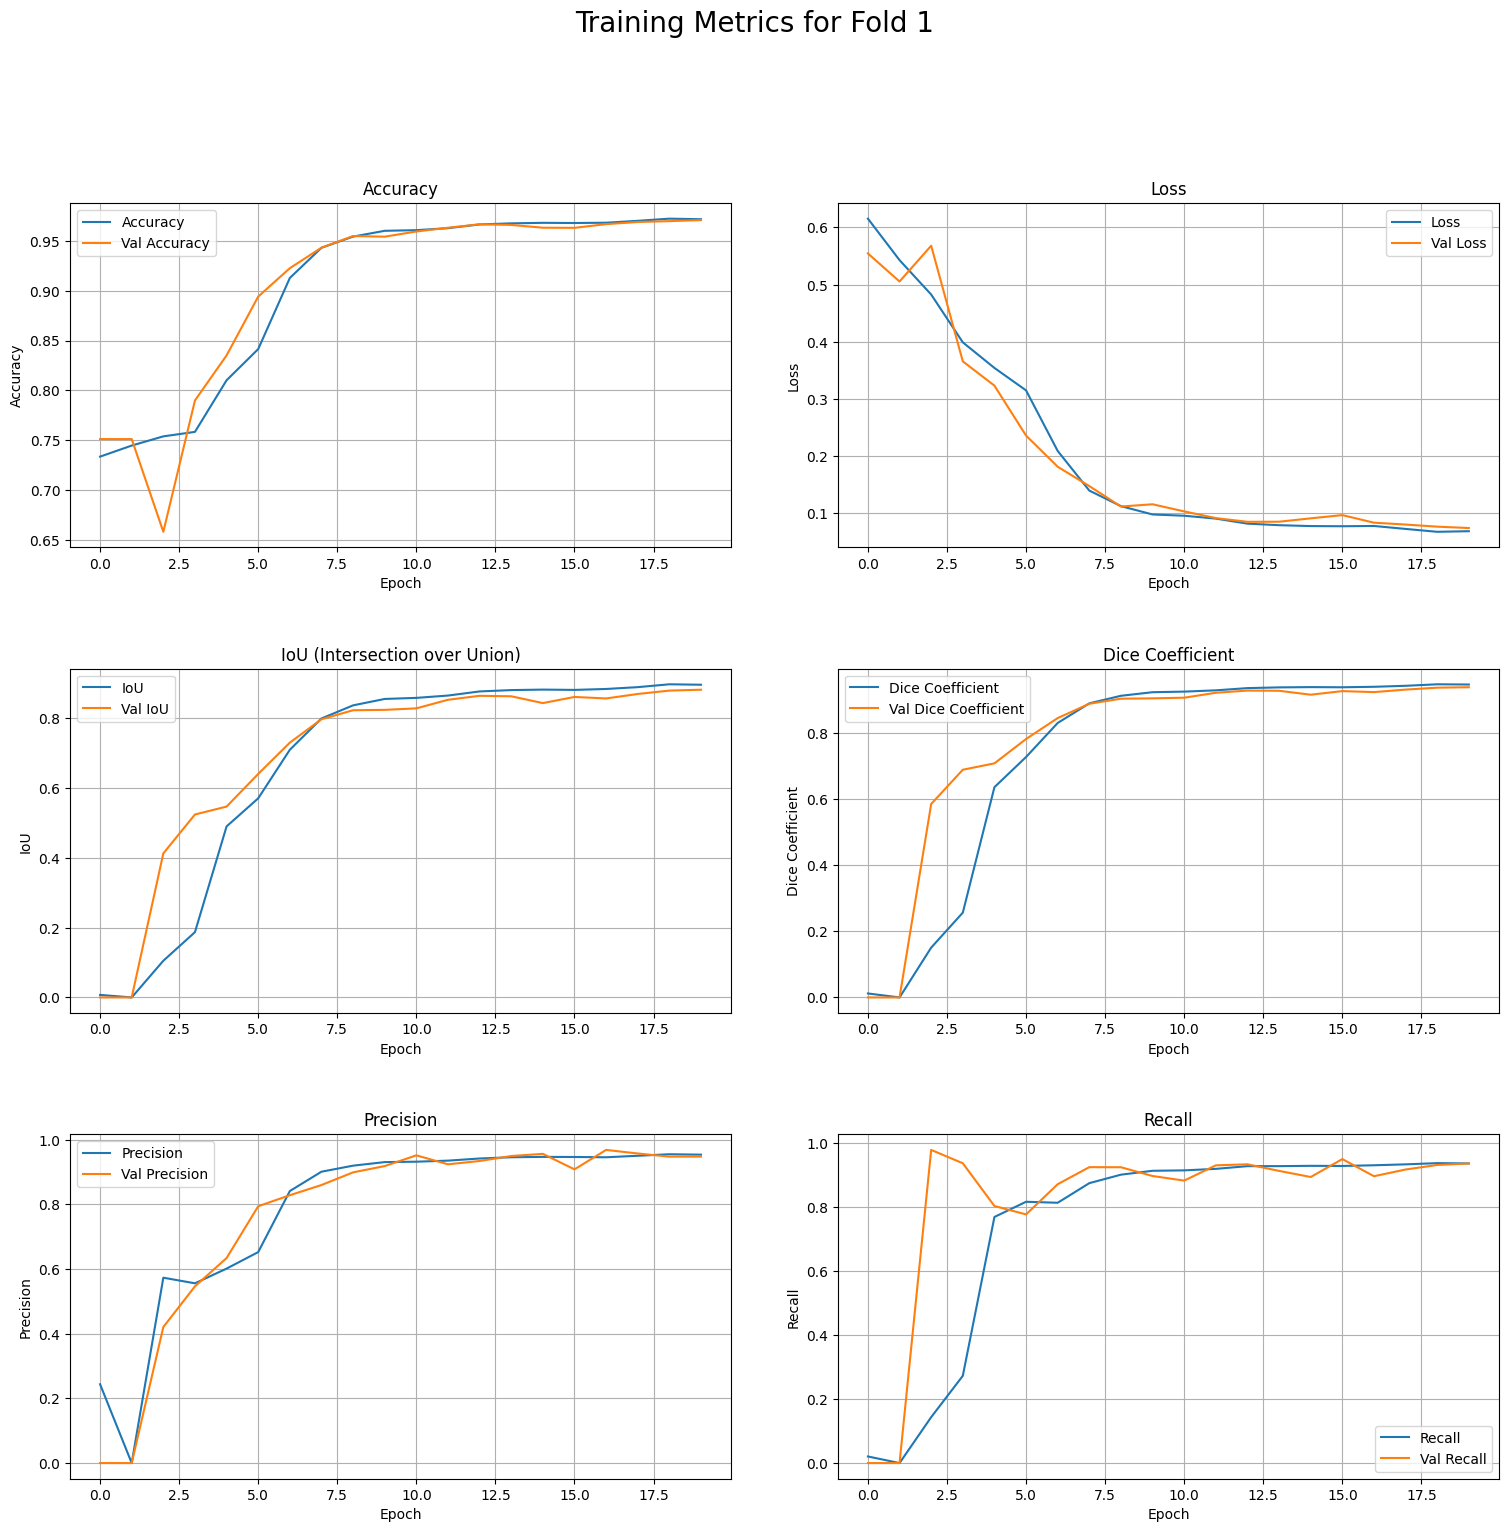

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 403ms/step - accuracy: 0.7178 - dice_metric: 0.0453 - iou_metric: 0.0273 - loss: 0.6797 - precision_13: 0.2817 - recall_13: 0.0613 - val_accuracy: 0.7427 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.6396 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.7493 - dice_metric: 0.0000e+00 - iou_metric: 0.0000e+00 - loss: 0.6046 - precision_13: 0.0000e+00 - recall_13: 0.0000e+00 - val_accuracy: 0.7427 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.4520 - val_precision_13: 0.0000e+00 - val_recall_13: 0.0000e+00
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.7507 - dice_metric: 0.0059 - iou_metric: 0.0036 - loss: 0.4286 - precision_13: 0.1776 - recall_13: 0.0033 - val_accuracy: 0.8188 - val_dice_metric: 0.7247 - val_iou_metric: 0.5686 - val_loss: 0.3772 - val_precision_13: 0.5969 - val_recall_13: 0.9227
Epo

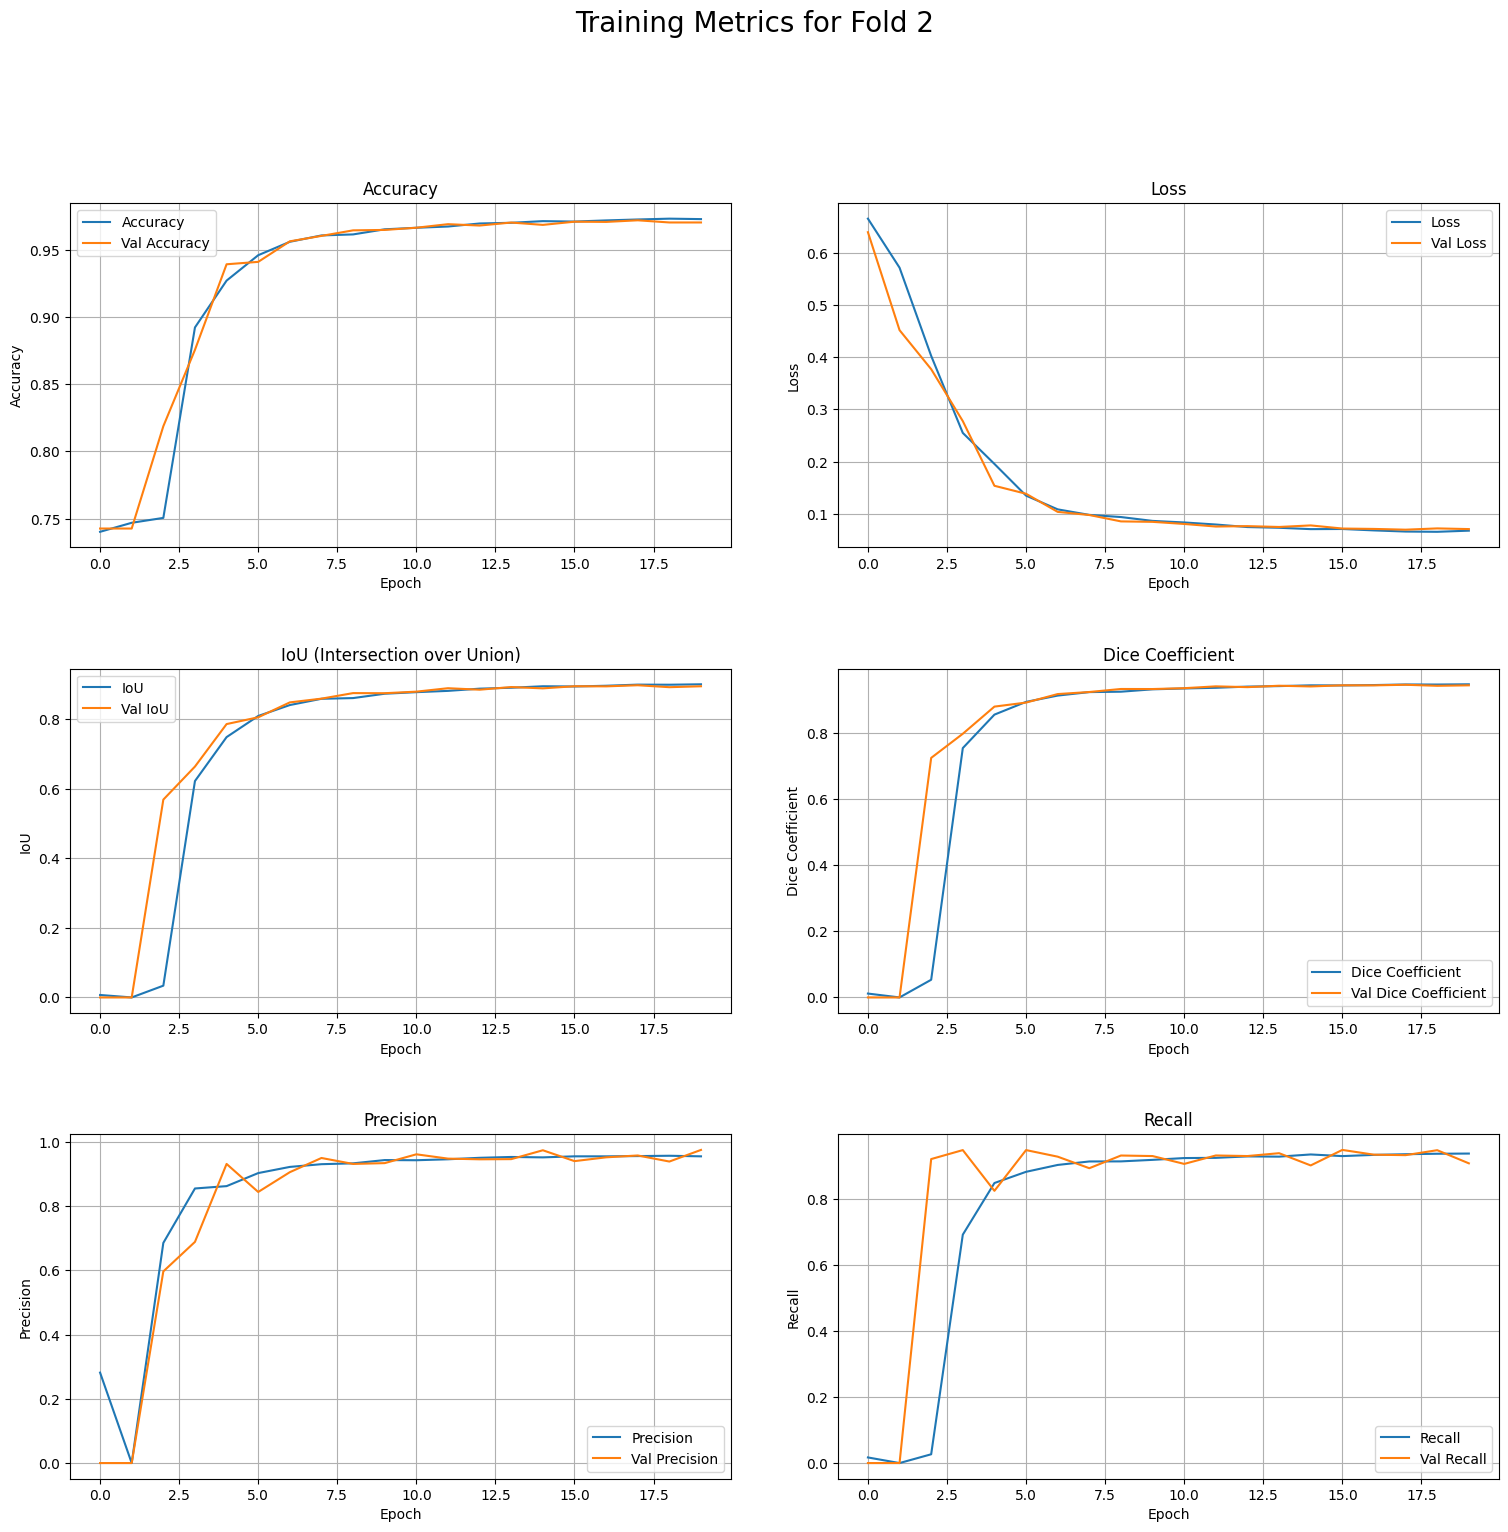

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 436ms/step - accuracy: 0.7224 - dice_metric: 0.0385 - iou_metric: 0.0225 - loss: 0.7029 - precision_15: 0.2551 - recall_15: 0.0447 - val_accuracy: 0.7459 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.6501 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.7466 - dice_metric: 0.0000e+00 - iou_metric: 0.0000e+00 - loss: 0.6407 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00 - val_accuracy: 0.7459 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.7761 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.7447 - dice_metric: 0.0000e+00 - iou_metric: 0.0000e+00 - loss: 0.6293 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00 - val_accuracy: 0.7459 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.5645 - val_precision_15: 0.0000e+00

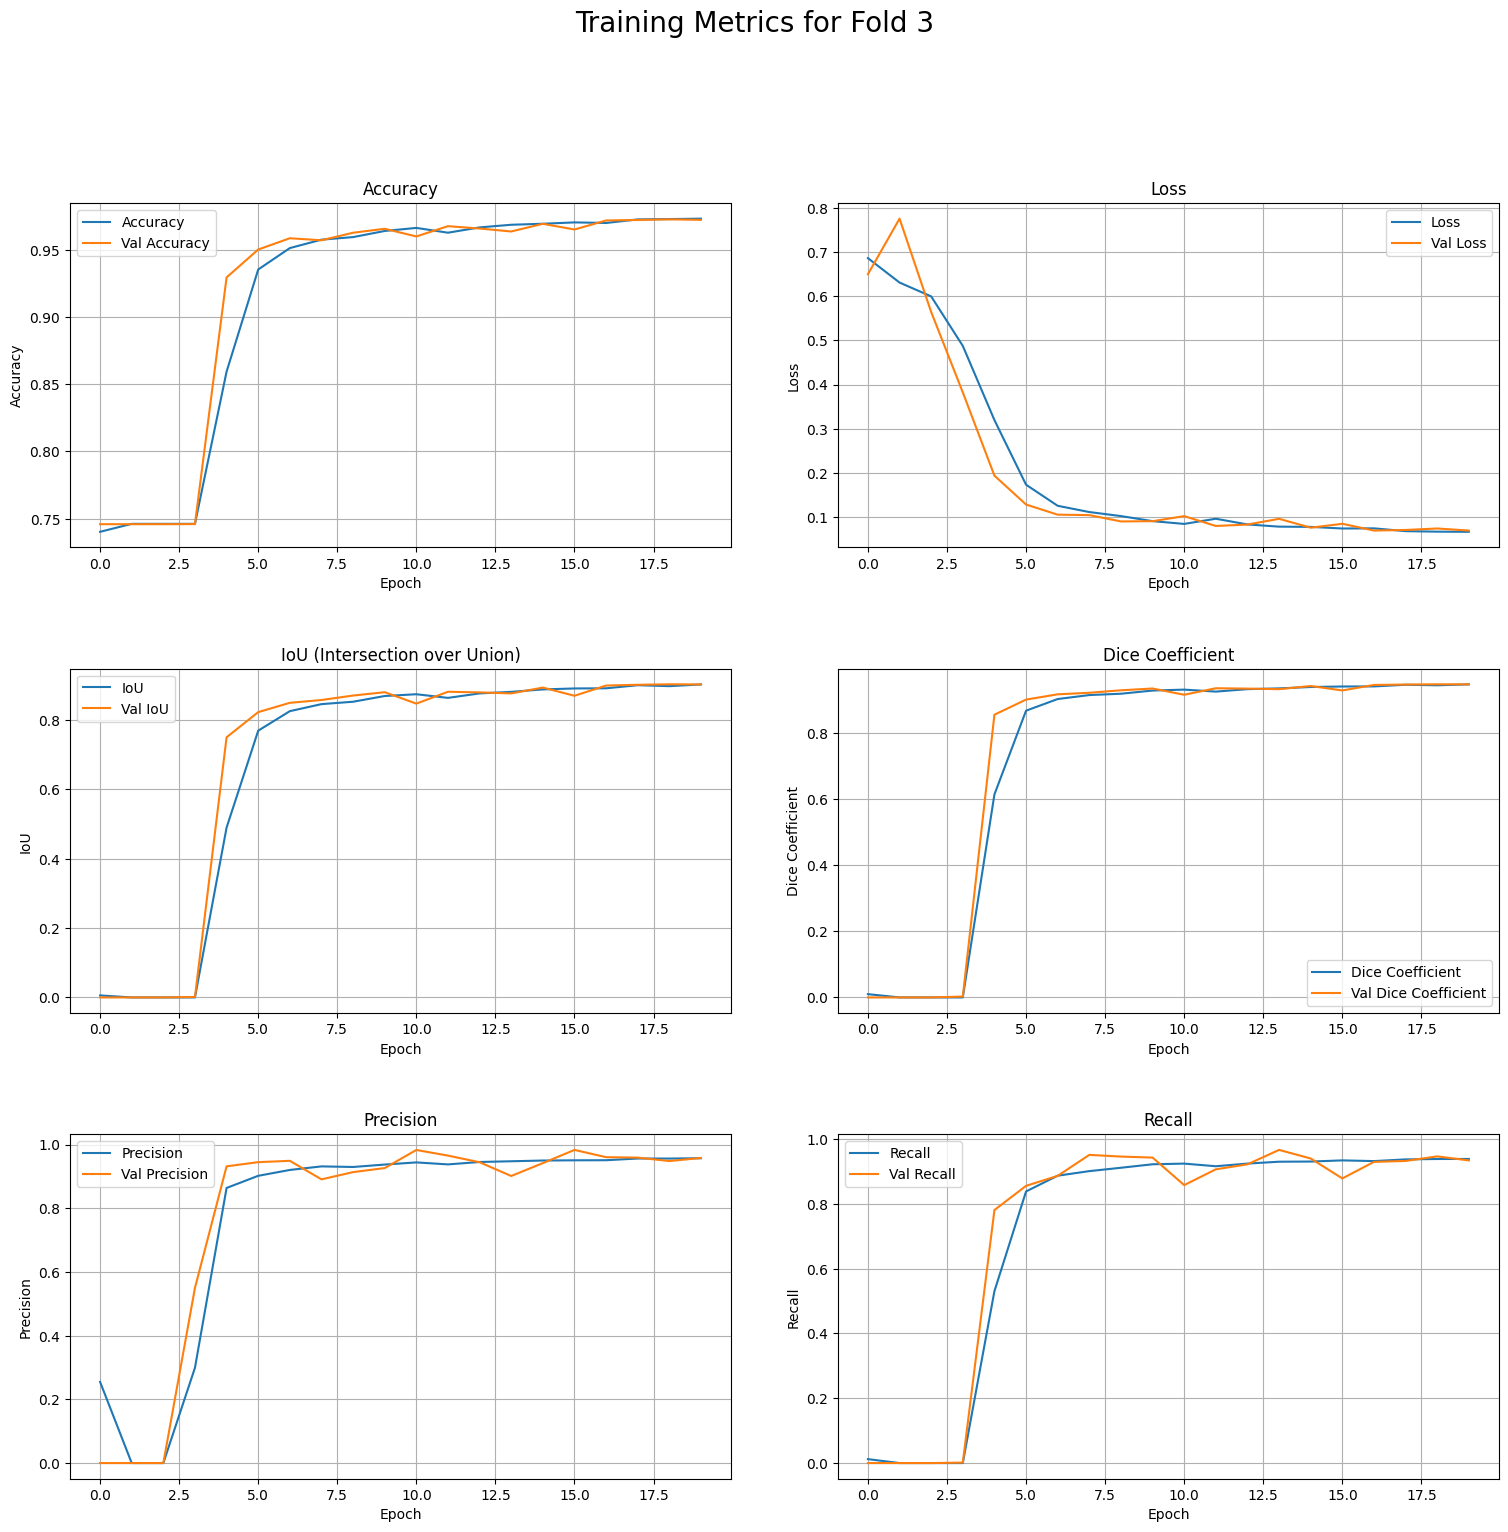

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 407ms/step - accuracy: 0.7113 - dice_metric: 0.0495 - iou_metric: 0.0304 - loss: 0.6575 - precision_17: 0.2777 - recall_17: 0.0788 - val_accuracy: 0.7479 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.4793 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.7491 - dice_metric: 2.3573e-04 - iou_metric: 1.1857e-04 - loss: 0.4747 - precision_17: 0.0980 - recall_17: 1.2146e-04 - val_accuracy: 0.7479 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.3764 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.7725 - dice_metric: 0.1494 - iou_metric: 0.1121 - loss: 0.3544 - precision_17: 0.5854 - recall_17: 0.1272 - val_accuracy: 0.8836 - val_dice_metric: 0.7931 - val_iou_metric: 0.6574 - val_loss: 0.3213 - val_precision_17: 0.7214 - val_recall_17: 0.8824
Epoch 4

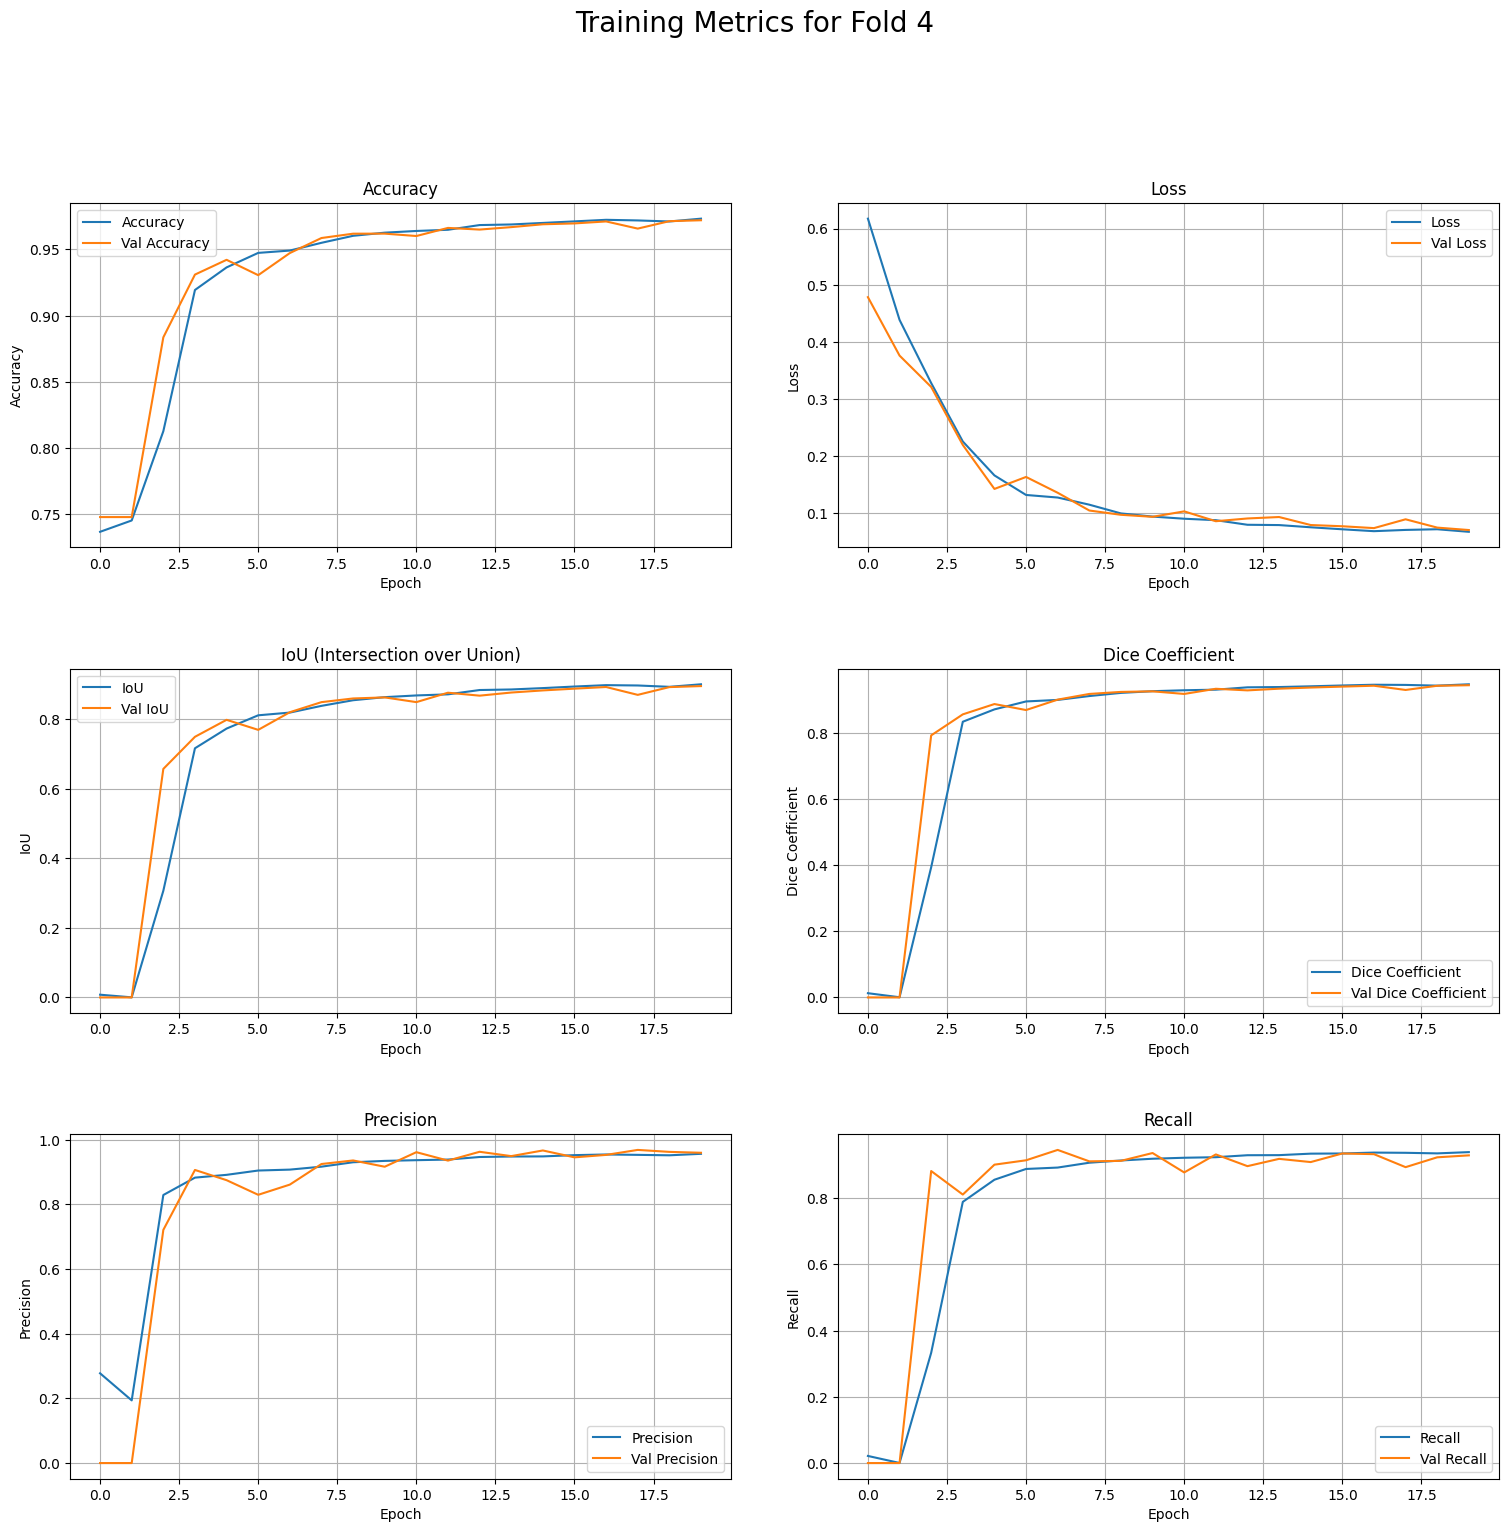

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 383ms/step - accuracy: 0.7168 - dice_metric: 0.0483 - iou_metric: 0.0285 - loss: 0.7106 - precision_19: 0.2705 - recall_19: 0.0593 - val_accuracy: 0.7426 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.6359 - val_precision_19: 0.0000e+00 - val_recall_19: 0.0000e+00
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.7491 - dice_metric: 6.9946e-04 - iou_metric: 3.5052e-04 - loss: 0.5965 - precision_19: 0.2306 - recall_19: 3.6513e-04 - val_accuracy: 0.7426 - val_dice_metric: 0.0000e+00 - val_iou_metric: 0.0000e+00 - val_loss: 0.4952 - val_precision_19: 0.0000e+00 - val_recall_19: 0.0000e+00
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.7486 - dice_metric: 1.1550e-05 - iou_metric: 5.7758e-06 - loss: 0.4429 - precision_19: 0.0538 - recall_19: 5.7291e-06 - val_accuracy: 0.7426 - val_dice_metric: 3.0147e-05 - val_iou_metric: 1.5074e-05 - val_loss: 0.3759 - val_precision_19: 0.2276 - val_recal

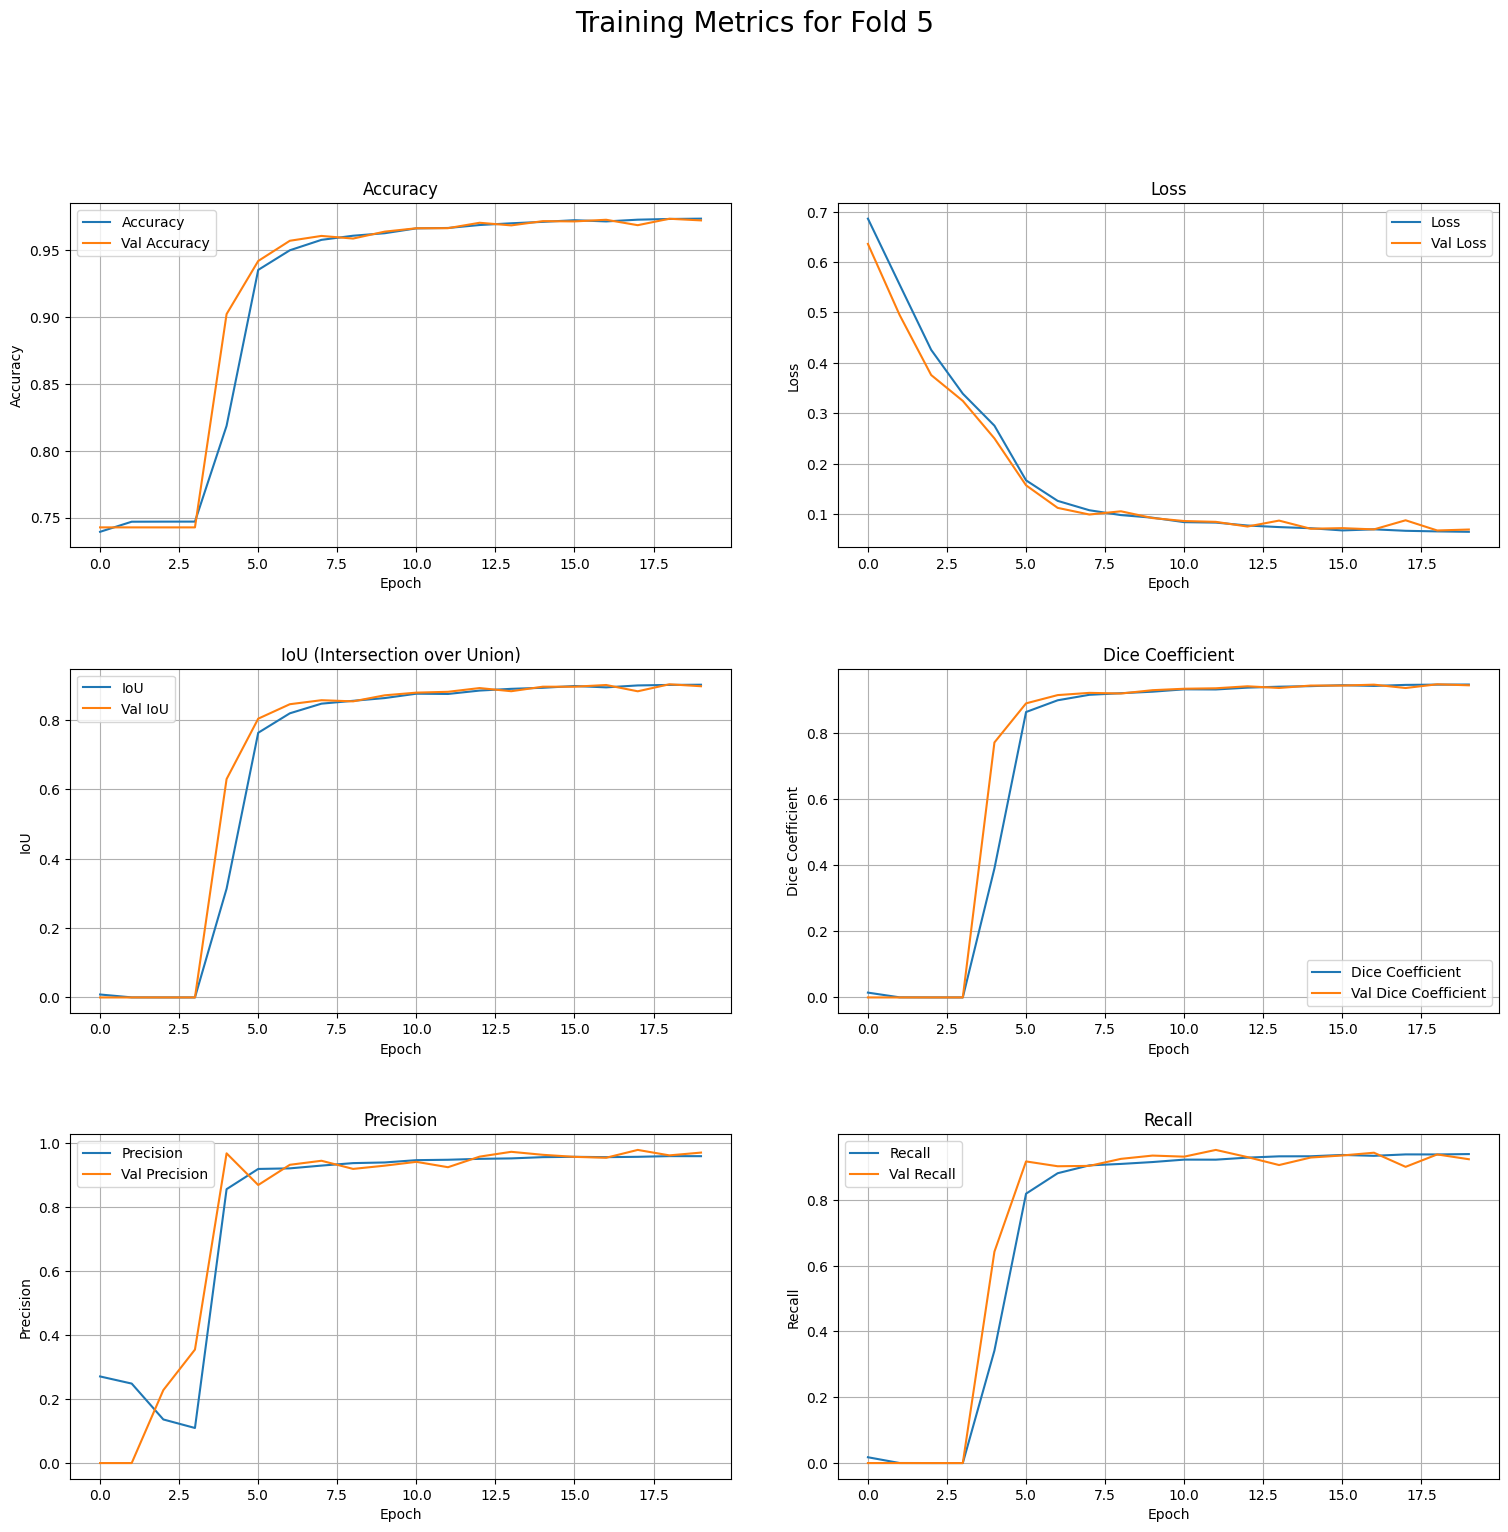


Best model saved and zipped as: best_model.zip
Best Model: Fold 3
Avg. Accuracy: 0.9715
Avg. Loss: 0.0705
Avg. IoU Score: 0.8923
Avg. Dice Score: 0.9422
Avg. Precision: 0.9620
Avg. Recall: 0.9267


In [74]:
# KFold setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
iou_scores, dice_scores, acc_scores, loss_scores = [], [], [], []
precision_scores, recall_scores = [], []

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model = new_custom_model(input_size=(256, 256, 1))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', iou_metric, dice_metric,
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall()])

    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold),
                        epochs=20, batch_size=16, verbose=1)

    y_pred_val = model.predict(X_val_fold)
    y_pred_train = model.predict(X_train_fold)

    y_pred_val = (y_pred_val > 0.5).astype(np.float32)
    y_pred_train = (y_pred_train > 0.5).astype(np.float32)

    train_loss, train_acc, _, _, _, _ = model.evaluate(X_train_fold, y_train_fold, verbose=0)
    val_loss, val_acc, _, _, _, _ = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    val_iou = np.mean([iou_metric(y_t, y_p).numpy() for y_t, y_p in zip(y_val_fold, y_pred_val)])
    val_dice = np.mean([dice_metric(y_t, y_p).numpy() for y_t, y_p in zip(y_val_fold, y_pred_val)])
    train_iou = np.mean([iou_metric(y_t, y_p).numpy() for y_t, y_p in zip(y_train_fold, y_pred_train)])
    train_dice = np.mean([dice_metric(y_t, y_p).numpy() for y_t, y_p in zip(y_train_fold, y_pred_train)])

    precision = Precision()
    recall = Recall()
    precision.update_state(y_val_fold, y_pred_val)
    recall.update_state(y_val_fold, y_pred_val)
    val_precision = precision.result().numpy()
    val_recall = recall.result().numpy()

    precision.reset_state()
    recall.reset_state()
    precision.update_state(y_train_fold, y_pred_train)
    recall.update_state(y_train_fold, y_pred_train)
    train_precision = precision.result().numpy()
    train_recall = recall.result().numpy()

    print(f"\nFold {fold_no} Metrics:")
    print(f"{'Metric':<18}{'Train':>12}{'Validation':>15}")
    print(f"{'-'*45}")
    print(f"{'Accuracy':<18}{train_acc:>12.4f}{val_acc:>15.4f}")
    print(f"{'Loss':<18}{train_loss:>12.4f}{val_loss:>15.4f}")
    print(f"{'IoU Score':<18}{train_iou:>12.4f}{val_iou:>15.4f}")
    print(f"{'Dice Score':<18}{train_dice:>12.4f}{val_dice:>15.4f}")
    print(f"{'Precision':<18}{train_precision:>12.4f}{val_precision:>15.4f}")
    print(f"{'Recall':<18}{train_recall:>12.4f}{val_recall:>15.4f}")

    acc_scores.append(val_acc)
    loss_scores.append(val_loss)
    iou_scores.append(val_iou)
    dice_scores.append(val_dice)
    precision_scores.append(val_precision)
    recall_scores.append(val_recall)

    model_path = f"custom_model_fold_{fold_no}.h5"
    model.save(model_path)

    plot_history1(history,fold_no)
    fold_no += 1

# Best model selection and zipping
best_model_idx = np.argmax(acc_scores)
best_model_path = f"custom_model_fold_{best_model_idx + 1}.h5"
best_model = load_model(best_model_path, custom_objects={
    'iou_metric': iou_metric,
    'dice_metric': dice_metric
})

zip_path = "best_model.zip"
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write(best_model_path)

print(f"\nBest model saved and zipped as: {zip_path}")
print(f"Best Model: Fold {best_model_idx + 1}")
print(f"Avg. Accuracy: {np.mean(acc_scores):.4f}")
print(f"Avg. Loss: {np.mean(loss_scores):.4f}")
print(f"Avg. IoU Score: {np.mean(iou_scores):.4f}")
print(f"Avg. Dice Score: {np.mean(dice_scores):.4f}")
print(f"Avg. Precision: {np.mean(precision_scores):.4f}")
print(f"Avg. Recall: {np.mean(recall_scores):.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Showing X-ray, Ground Truth Mask, Predicted Mask, and Overlap:


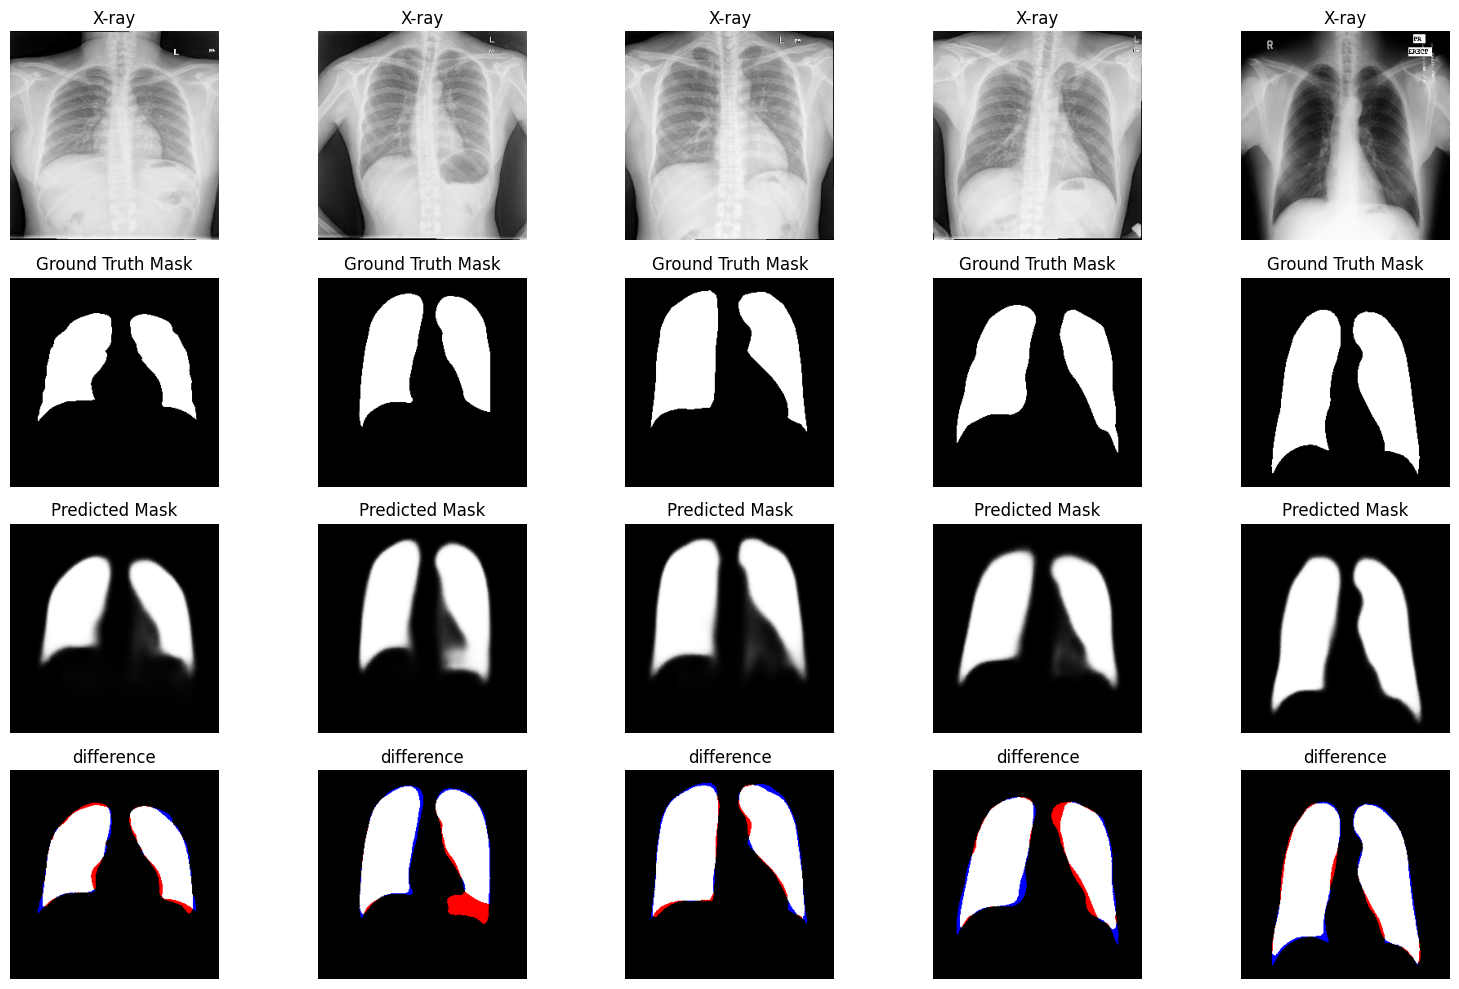

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Select 5 random indices from the test dataset
random_indices = np.random.choice(len(X_test),5, replace=False)

# Generate predictions for the selected test samples
pred = best_model.predict(X_test[random_indices])

print("Showing X-ray, Ground Truth Mask, Predicted Mask, and Overlap:")
plt.figure(figsize=(16, 10))

for i, idx in enumerate(random_indices):
    # Original X-ray
    plt.subplot(4, 5, i+1)
    plt.imshow(X_test[idx].squeeze(), cmap='gray')
    plt.title("X-ray")
    plt.axis('off')

    # Ground Truth Mask
    plt.subplot(4, 5, i+6)
    plt.imshow(y_test[idx].squeeze(), cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis('off')

    # Predicted Mask
    plt.subplot(4, 5, i+11)
    plt.imshow(pred[i].squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

    # Overlap Visualization
    plt.subplot(4, 5, i+16)
    
    y_true = y_test[idx].squeeze()
    y_pred = (pred[i].squeeze() > 0.5).astype(np.uint8)  # Convert to binary mask

    # Create color-coded overlay
    overlap = np.zeros((y_true.shape[0], y_true.shape[1], 3))  # RGB image
    overlap[y_true == 1] = [0, 0, 1]  # Blue = Ground Truth
    overlap[y_pred == 1] = [1, 0, 0]  # Red = Prediction
    overlap[(y_true == 1) & (y_pred == 1)] = [1, 1, 1]  # White = Correct Segmentation

    plt.imshow(overlap)
    plt.title("difference")
    plt.axis('off')

plt.tight_layout()
plt.show()